In [1]:
import pandas as pd
#df = pd.read_json('watcher_crawl/watcher.jl', lines=True)
df = pd.read_json('../watcher_crawl/watcher.jl', lines=True)

In [2]:
df.head(5)

,company_name,company_code,company_sector,company_industry,scraped_table,records
0,adani-enterprises-ltd,9074,Diversified,Diversified,income-quaterly,"{'columns': ['fields', 'Sep 2021', 'Jun 2021',..."
1,adani-enterprises-ltd,9074,Diversified,Diversified,income-annual,"{'columns': ['fields', 'FY 2021', 'FY 2020',..."
2,adani-enterprises-ltd,9074,Diversified,Diversified,balance-sheet,"{'columns': ['fields', 'FY 2021', 'FY 2020',..."
3,adani-enterprises-ltd,9074,Diversified,Diversified,cash-flow,"{'columns': ['fields', 'FY 2021', 'FY 2020',..."
4,adani-enterprises-ltd,9074,Diversified,Diversified,ratios,"{'columns': ['fields', 'FY 2021', 'FY 2020',..."


In [3]:
df['table_name'] = df['company_name'].astype(str) + '_' + df['scraped_table'].astype(str)
df['company_code'] = df['company_code'].astype(str)

In [4]:
df.head()

,company_name,company_code,company_sector,company_industry,scraped_table,records,table_name
0,adani-enterprises-ltd,9074,Diversified,Diversified,income-quaterly,"{'columns': ['fields', 'Sep 2021', 'Jun 2021',...",adani-enterprises-ltd_income-quaterly
1,adani-enterprises-ltd,9074,Diversified,Diversified,income-annual,"{'columns': ['fields', 'FY 2021', 'FY 2020',...",adani-enterprises-ltd_income-annual
2,adani-enterprises-ltd,9074,Diversified,Diversified,balance-sheet,"{'columns': ['fields', 'FY 2021', 'FY 2020',...",adani-enterprises-ltd_balance-sheet
3,adani-enterprises-ltd,9074,Diversified,Diversified,cash-flow,"{'columns': ['fields', 'FY 2021', 'FY 2020',...",adani-enterprises-ltd_cash-flow
4,adani-enterprises-ltd,9074,Diversified,Diversified,ratios,"{'columns': ['fields', 'FY 2021', 'FY 2020',...",adani-enterprises-ltd_ratios


In [5]:
table_names = list(df['table_name'])
print(table_names)
company_codes = list(df['company_code'])
print(company_codes)

['adani-enterprises-ltd_income-quaterly', 'adani-enterprises-ltd_income-annual', 'adani-enterprises-ltd_balance-sheet', 'adani-enterprises-ltd_cash-flow', 'adani-enterprises-ltd_ratios', 'bharti-airtel-ltd_income-quaterly', 'bharti-airtel-ltd_income-annual', 'bharti-airtel-ltd_balance-sheet', 'bharti-airtel-ltd_cash-flow', 'bharti-airtel-ltd_ratios', 'bajaj-finance-ltd_income-quaterly', 'bajaj-finance-ltd_income-annual', 'bajaj-finance-ltd_balance-sheet', 'bajaj-finance-ltd_cash-flow', 'bajaj-finance-ltd_ratios', 'hdfc-bank-ltd_income-quaterly', 'hdfc-bank-ltd_income-annual', 'hdfc-bank-ltd_balance-sheet', 'hdfc-bank-ltd_cash-flow', 'hdfc-bank-ltd_ratios', 'reliance-industries-ltd_income-quaterly', 'reliance-industries-ltd_income-annual', 'reliance-industries-ltd_balance-sheet', 'reliance-industries-ltd_cash-flow', 'reliance-industries-ltd_ratios']
['9074', '9074', '9074', '9074', '9074', '2718', '2718', '2718', '2718', '2718', '11260', '11260', '11260', '11260', '11260', '9195', '9195

In [6]:
import pymongo

In [7]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
m_db = myclient["The-watcher"]

In [8]:
df_collection = [] 
for i in range(df.shape[0]):
    company_code = company_codes[i]
    table_name = m_db[table_names[i]]
    column_names = df['records'][i].get('columns')
    df2 = pd.DataFrame(df['records'][i].get('values'), columns = column_names)
    #print(df2.head())
    #df2.index = [str(i) for i in range(len(df2))]
    df2.set_index('fields',inplace=True)
    df3 = df2.T
    print(df3.head())
    
    df3.reset_index(inplace=True)
    df3['company_code'] = company_code
    df_collection.append(df3)
    table_name.insert_many(df3.to_dict('records'))
    for i in table_name.find():
        print(i)


fields   Total Income Total Income Growth (%) Total Expenses  \
Sep 2021    13,597.10                    6.81      12,655.00   
Jun 2021    12,730.63                   -7.00      11,907.96   
Mar 2021    13,688.95                   16.13      12,957.03   
Dec 2020    11,787.82                   26.59      11,060.12   
Sep 2020     9,312.14                   69.25       8,484.57   

fields   Total Expenses Growth (%)    EBIT EBIT Growth (%)  \
Sep 2021                      6.27  942.10           14.52   
Jun 2021                     -8.10  822.67           12.40   
Mar 2021                     17.15  731.92            0.58   
Dec 2020                     30.36  727.70          -12.07   
Sep 2020                     59.29  827.57          371.20   

fields   Profit after Tax (PAT) PAT Growth (%) EBIT Margin (%)  \
Sep 2021                 212.41         -21.75            6.93   
Jun 2021                 271.46          16.03            6.46   
Mar 2021                 233.95         -21.

{'_id': ObjectId('625427cafdae24569aa4ba79'), 'index': 'FY  2021', 'Return on Equity (%)': '-25.58', 'Return on Capital Employed (%)': '7.08', 'Return on Assets (%)': '-4.35', 'Interest Coverage Ratio (x)': '1.10', 'Asset Turnover Ratio (x)': '29.07', 'Price to Earnings (x)': '-18.87', 'Price to Book (x)': '4.82', 'EV/EBITDA (x)': '9.19', 'EBITDA Margin (%)': '45.73', 'company_code': '2718'}
{'_id': ObjectId('625427cafdae24569aa4ba7a'), 'index': 'FY  2020', 'Return on Equity (%)': '-41.71', 'Return on Capital Employed (%)': '4.67', 'Return on Assets (%)': '-8.92', 'Interest Coverage Ratio (x)': '0.77', 'Asset Turnover Ratio (x)': '24.26', 'Price to Earnings (x)': '-7.47', 'Price to Book (x)': '3.12', 'EV/EBITDA (x)': '9.56', 'EBITDA Margin (%)': '43.88', 'company_code': '2718'}
{'_id': ObjectId('625427cafdae24569aa4ba7b'), 'index': 'FY  2019', 'Return on Equity (%)': '0.57', 'Return on Capital Employed (%)': '3.07', 'Return on Assets (%)': '0.14', 'Interest Coverage Ratio (x)': '0.53',

{'_id': ObjectId('625427cafdae24569aa4baab'), 'index': 'FY  2021', 'Return on Equity (%)': '15.17', 'Return on Assets (%)': '1.76', 'Cost to Income (%)': '41.55', 'Interest income to Earning assets (%)': '7.14', 'Interest Expense to Earning assets (%)': '3.29', 'Price to Earnings (x)': '25.91', 'Price to Book (x)': '3.92', 'Price to Sales (x)': '6.40', 'Operating Profit Margin (%)': '3.51', 'company_code': '9195'}
{'_id': ObjectId('625427cafdae24569aa4baac'), 'index': 'FY  2020', 'Return on Equity (%)': '15.45', 'Return on Assets (%)': '1.72', 'Cost to Income (%)': '39.18', 'Interest income to Earning assets (%)': '7.72', 'Interest Expense to Earning assets (%)': '3.93', 'Price to Earnings (x)': '17.36', 'Price to Book (x)': '2.68', 'Price to Sales (x)': '3.87', 'Operating Profit Margin (%)': '1.97', 'company_code': '9195'}
{'_id': ObjectId('625427cafdae24569aa4baad'), 'index': 'FY  2019', 'Return on Equity (%)': '14.53', 'Return on Assets (%)': '1.72', 'Cost to Income (%)': '38.63', '

In [13]:
collections = m_db.list_collection_names()
print(len(collections))

27


In [14]:
m_db.list_collection_names()


['company_details',
 'adani-enterprises-ltd_balance-sheet',
 'reliance-industries-ltd_cash-flow',
 'bajaj-finance-ltd_income-annual',
 'bharti-airtel-ltd_ratios',
 'bajaj-finance-ltd_cash-flow',
 'hdfc-bank-ltd_ratios',
 'hdfc-bank-ltd_income-quaterly',
 'adani-enterprises-ltd_ratios',
 'adani-enterprises-ltd_income-quaterly',
 'bajaj-finance-ltd_ratios',
 'adani-enterprises-ltd_income-annual',
 'reliance-industries-ltd_income-annual',
 'adani-enterprises-ltd_cash-flow',
 'hdfc-bank-ltd_cash-flow',
 'bharti-airtel-ltd_income-quaterly',
 'nse_companies',
 'bharti-airtel-ltd_cash-flow',
 'reliance-industries-ltd_income-quaterly',
 'hdfc-bank-ltd_balance-sheet',
 'bharti-airtel-ltd_income-annual',
 'bajaj-finance-ltd_income-quaterly',
 'reliance-industries-ltd_balance-sheet',
 'hdfc-bank-ltd_income-annual',
 'bharti-airtel-ltd_balance-sheet',
 'reliance-industries-ltd_ratios',
 'bajaj-finance-ltd_balance-sheet']

In [11]:
coll = m_db['bharti-airtel-ltd_income-quaterly']
for i in coll.find():
    print(i)

{'_id': ObjectId('625427cafdae24569aa4ba65'), 'index': 'Sep 2021', 'Total Income': '28,435.20', 'Total Income Growth (%)': '5.07', 'Total Expenses': '22,041.00', 'Total Expenses Growth (%)': '7.17', 'EBIT': '6,394.20', 'EBIT Growth (%)': '-1.57', 'Profit after Tax (PAT)': '1,134.00', 'PAT Growth (%)': '300.00', 'EBIT Margin (%)': '22.49', 'Net Profit Margin (%)': '3.99', 'Basic EPS (₹)': '2.06', 'company_code': '2718'}
{'_id': ObjectId('625427cafdae24569aa4ba66'), 'index': 'Jun 2021', 'Total Income': '27,063.40', 'Total Income Growth (%)': '4.77', 'Total Expenses': '20,567.10', 'Total Expenses Growth (%)': '0.44', 'EBIT': '6,496.30', 'EBIT Growth (%)': '21.33', 'Profit after Tax (PAT)': '283.50', 'PAT Growth (%)': '-62.66', 'EBIT Margin (%)': '24.00', 'Net Profit Margin (%)': '1.05', 'Basic EPS (₹)': '0.52', 'company_code': '2718'}
{'_id': ObjectId('625427cafdae24569aa4ba67'), 'index': 'Mar 2021', 'Total Income': '25,831.20', 'Total Income Growth (%)': '-2.77', 'Total Expenses': '20,47

In [12]:
sample_df = df_collection[0]
sample_df.head()

fields,index,Total Income,Total Income Growth (%),Total Expenses,Total Expenses Growth (%),EBIT,EBIT Growth (%),Profit after Tax (PAT),PAT Growth (%),EBIT Margin (%),Net Profit Margin (%),Basic EPS (₹),company_code
0,Sep 2021,"13,597.10",6.81,"12,655.00",6.27,942.10,14.52,212.41,-21.75,6.93,1.56,1.93,9074
1,Jun 2021,"12,730.63",-7.00,"11,907.96",-8.10,822.67,12.40,271.46,16.03,6.46,2.13,2.47,9074
2,Mar 2021,"13,688.95",16.13,"12,957.03",17.15,731.92,0.58,233.95,-21.18,5.35,1.71,2.13,9074
3,Dec 2020,"11,787.82",26.59,"11,060.12",30.36,727.70,-12.07,296.81,-18.09,6.17,2.52,2.70,9074
4,Sep 2020,"9,312.14",69.25,"8,484.57",59.29,827.57,371.20,362.37,"1,116.41",8.89,3.89,3.30,9074


In [14]:
sample_df.describe()

fields,index,Total Income,Total Income Growth (%),Total Expenses,Total Expenses Growth (%),EBIT,EBIT Growth (%),Profit after Tax (PAT),PAT Growth (%),EBIT Margin (%),Net Profit Margin (%),Basic EPS (₹),company_code
count,5,5,5,5,5,5,5,5,5,5,5,5,5
unique,5,5,5,5,5,5,5,5,5,5,5,5,1
top,Sep 2021,"13,597.10",6.81,"12,655.00",6.27,942.10,14.52,212.41,-21.75,6.93,1.56,1.93,9074
freq,1,1,1,1,1,1,1,1,1,1,1,1,5


In [15]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   index                      5 non-null      object
 1   Total Income               5 non-null      object
 2   Total Income Growth (%)    5 non-null      object
 3   Total Expenses             5 non-null      object
 4   Total Expenses Growth (%)  5 non-null      object
 5   EBIT                       5 non-null      object
 6   EBIT Growth (%)            5 non-null      object
 7   Profit after Tax (PAT)     5 non-null      object
 8   PAT Growth (%)             5 non-null      object
 9   EBIT Margin (%)            5 non-null      object
 10  Net Profit Margin (%)      5 non-null      object
 11  Basic EPS (₹)              5 non-null      object
 12  company_code               5 non-null      object
dtypes: object(13)
memory usage: 648.0+ bytes


In [16]:
sample_df

fields,index,Total Income,Total Income Growth (%),Total Expenses,Total Expenses Growth (%),EBIT,EBIT Growth (%),Profit after Tax (PAT),PAT Growth (%),EBIT Margin (%),Net Profit Margin (%),Basic EPS (₹),company_code
0,Sep 2021,"13,597.10",6.81,"12,655.00",6.27,942.10,14.52,212.41,-21.75,6.93,1.56,1.93,9074
1,Jun 2021,"12,730.63",-7.00,"11,907.96",-8.10,822.67,12.40,271.46,16.03,6.46,2.13,2.47,9074
2,Mar 2021,"13,688.95",16.13,"12,957.03",17.15,731.92,0.58,233.95,-21.18,5.35,1.71,2.13,9074
3,Dec 2020,"11,787.82",26.59,"11,060.12",30.36,727.70,-12.07,296.81,-18.09,6.17,2.52,2.70,9074
4,Sep 2020,"9,312.14",69.25,"8,484.57",59.29,827.57,371.20,362.37,"1,116.41",8.89,3.89,3.30,9074


In [17]:
sample_df.reset_index(inplace=True)

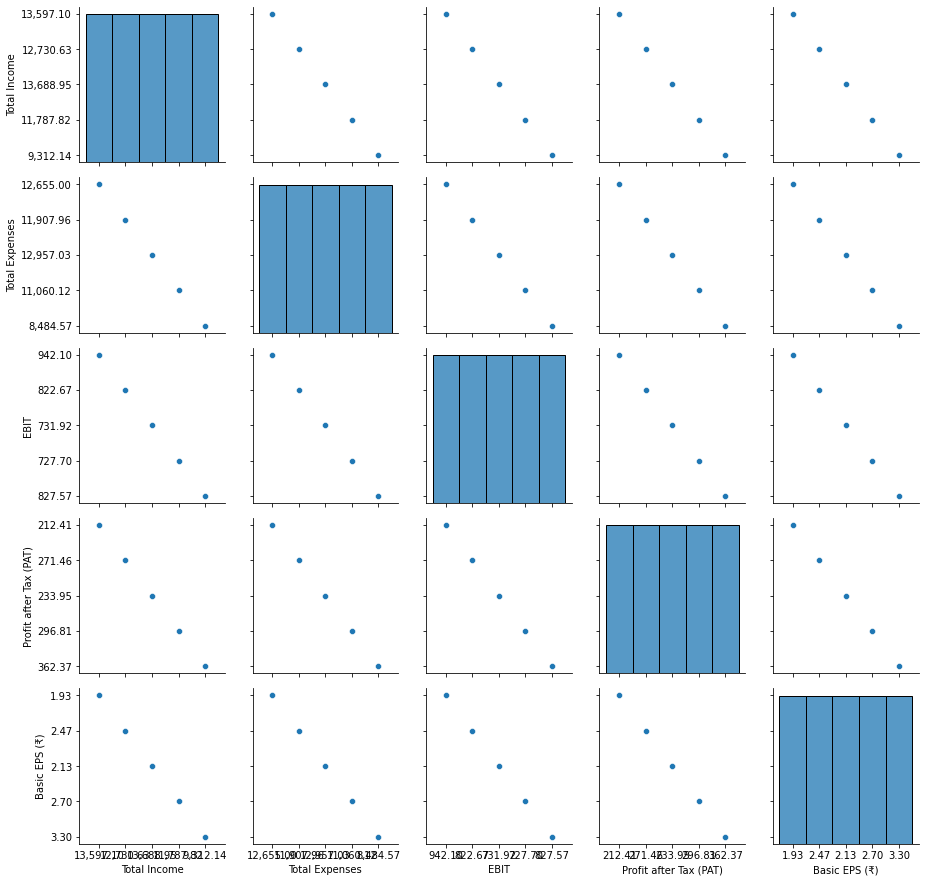

In [18]:
import seaborn as sns
g = sns.PairGrid(sample_df, x_vars=['Total Income', 'Total Expenses', 'EBIT', 'Profit after Tax (PAT)', 'Basic EPS (₹)'], y_vars=['Total Income', 'Total Expenses', 'EBIT', 'Profit after Tax (PAT)', 'Basic EPS (₹)'])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [19]:
df_iris = sns.load_dataset('iris')
df_iris.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

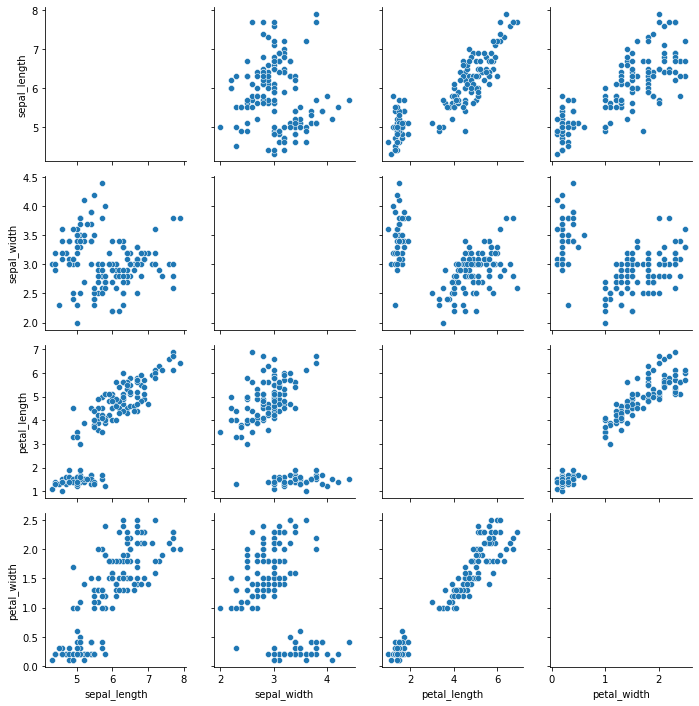

In [20]:
import seaborn as sns
g = sns.PairGrid(df_iris)
g.map_offdiag(sns.scatterplot)

In [21]:
m_db.list_collection_names()

['reliance-industries-ltd_ratios',
 'adani-enterprises-ltd_balance-sheet',
 'adani-enterprises-ltd_income-annual',
 'reliance-industries-ltd_income-annual',
 'reliance-industries-ltd_cash-flow',
 'adani-enterprises-ltd_cash-flow',
 'hdfc-bank-ltd_cash-flow',
 'bharti-airtel-ltd_income-quaterly',
 'nse_companies',
 'bajaj-finance-ltd_income-annual',
 'bharti-airtel-ltd_ratios',
 'bajaj-finance-ltd_cash-flow',
 'bharti-airtel-ltd_cash-flow',
 'reliance-industries-ltd_income-quaterly',
 'hdfc-bank-ltd_balance-sheet',
 'bharti-airtel-ltd_income-annual',
 'hdfc-bank-ltd_ratios',
 'bajaj-finance-ltd_income-quaterly',
 'hdfc-bank-ltd_income-quaterly',
 'adani-enterprises-ltd_ratios',
 'reliance-industries-ltd_balance-sheet',
 'hdfc-bank-ltd_income-annual',
 'adani-enterprises-ltd_income-quaterly',
 'bharti-airtel-ltd_balance-sheet',
 'bajaj-finance-ltd_ratios',
 'bajaj-finance-ltd_balance-sheet']

In [22]:
myclient.drop_database(m_db)